In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

## Loading the data, and converting into more readable format

In [2]:
data = pd.read_csv(r"C:\Users\parasrk\Documents\ML\iNeuron\data_stocks.csv")
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [3]:
data['DT'] = [datetime.fromtimestamp(x) for x in data['DATE']]
data['D'] = [datetime.fromtimestamp(x).strftime('%Y-%m-%d') for x in data['DATE']]
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,DT,D
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,2017-04-03 19:00:00,2017-04-03
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,2017-04-03 19:01:00,2017-04-03
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,2017-04-03 19:02:00,2017-04-03
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,2017-04-03 19:03:00,2017-04-03
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,2017-04-03 19:04:00,2017-04-03


In [4]:
melted = pd.melt(data,id_vars=['DATE','D','DT'])
melted.head()

,DATE,D,DT,variable,value
0,1491226200,2017-04-03,2017-04-03 19:00:00,SP500,2363.6101
1,1491226260,2017-04-03,2017-04-03 19:01:00,SP500,2364.1001
2,1491226320,2017-04-03,2017-04-03 19:02:00,SP500,2362.6799
3,1491226380,2017-04-03,2017-04-03 19:03:00,SP500,2364.3101
4,1491226440,2017-04-03,2017-04-03 19:04:00,SP500,2364.8501


In [5]:
a = melted.groupby(['variable','D'])['value'].max().reset_index()
a.columns = ['Stock','Date','Day_high']

b = melted.groupby(['variable','D'])['value'].min().reset_index()
b.columns = ['Stock','Date','Day_low']

c = melted.groupby(['variable','D'])['value'].mean().reset_index()
c.columns = ['Stock','Date','Day_avg']

i = melted.groupby(['variable','D'])['DT'].min().reset_index()
d = pd.merge(melted,i,on=['DT','variable'])[['variable','D_x','value']]
d.columns = ['Stock','Date','Day_open']

j = melted.groupby(['variable','D'])['DT'].max().reset_index()
e = pd.merge(melted,j,on=['DT','variable'])[['variable','D_x','value']]
e.columns = ['Stock','Date','Day_close']

In [6]:
ab = pd.merge(a,b,on=['Stock','Date'])
abc = pd.merge(ab,c,on=['Stock','Date'])
abcd = pd.merge(abc,d,on=['Stock','Date'])
final = pd.merge(abcd,e,on=['Stock','Date'])
final['Date'] = pd.to_datetime(final['Date'])

In [7]:
final.head()

,Stock,Date,Day_high,Day_low,Day_avg,Day_open,Day_close
0,NASDAQ.AAL,2017-04-03,42.5399,41.65,41.961871,42.33,41.860
1,NASDAQ.AAL,2017-04-04,42.5000,41.17,41.722800,41.87,41.170
2,NASDAQ.AAL,2017-04-05,42.1150,40.83,41.568564,41.14,41.915
3,NASDAQ.AAL,2017-04-06,41.9500,41.19,41.668652,41.92,41.650
4,NASDAQ.AAL,2017-04-07,42.0950,41.28,41.637277,41.65,41.980


## Analyzing the data using graphs to understand patterns

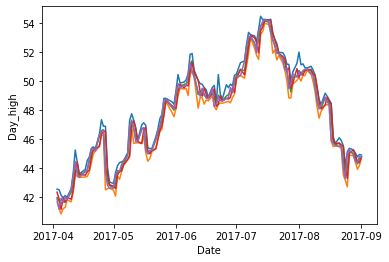

In [8]:
nas = final[final['Stock']=='NASDAQ.AAL']
sns.lineplot(x='Date',y='Day_high',data=nas);
sns.lineplot(x='Date',y='Day_low',data=nas);
sns.lineplot(x='Date',y='Day_avg',data=nas);
sns.lineplot(x='Date',y='Day_open',data=nas);
sns.lineplot(x='Date',y='Day_close',data=nas);

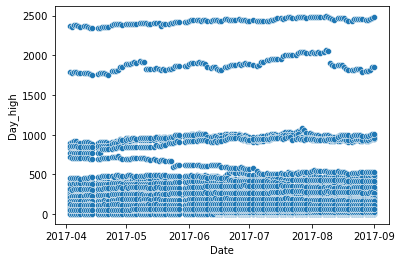

In [9]:
sns.scatterplot(x='Date',y='Day_high',data=final);

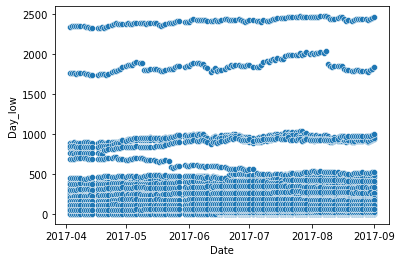

In [10]:
sns.scatterplot(x='Date',y='Day_low',data=final);

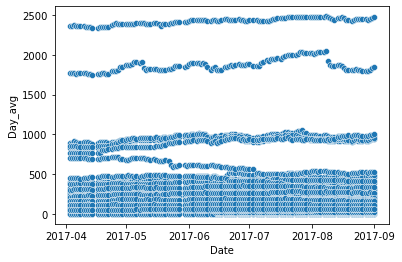

In [11]:
sns.scatterplot(x='Date',y='Day_avg',data=final);

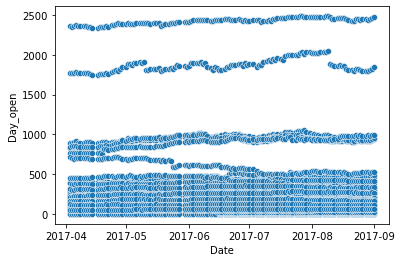

In [12]:
sns.scatterplot(x='Date',y='Day_open',data=final);

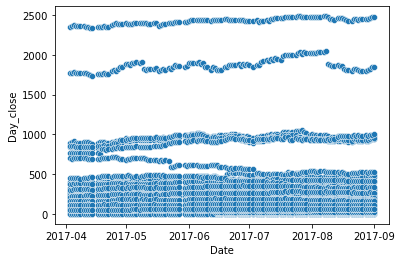

In [13]:
sns.scatterplot(x='Date',y='Day_close',data=final);

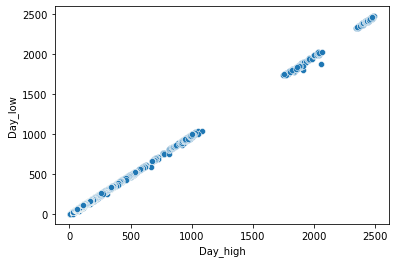

In [14]:
sns.scatterplot(x='Day_high',y='Day_low',data=final);

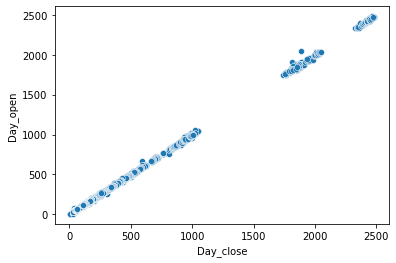

In [15]:
sns.scatterplot(x='Day_close',y='Day_open',data=final);

#### Note: 
Quite evident from the last 2 charts, the data can be formed into 3 clusters

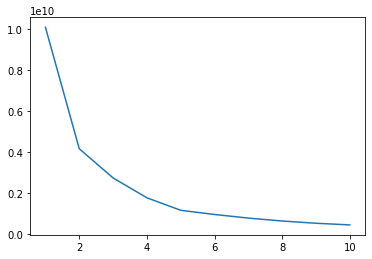

In [16]:
X = final.drop(['Date'],axis=1)
le = LabelEncoder()
X['Stock'] = le.fit_transform(X['Stock'])

K = []
SSE = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    K.append(i)
    SSE.append(km.inertia_)
    
plt.plot(K,SSE);

#### Note:
Per the elbow graph, there could be 3-5 clusters

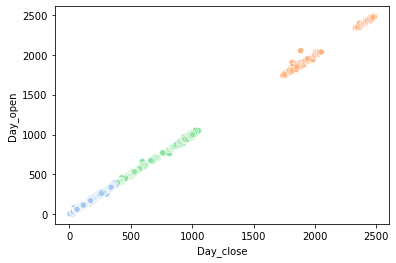

In [17]:
km = KMeans(n_clusters=3)
y_pred = pd.DataFrame(km.fit_predict(X),columns=['cluster'])

data_f = pd.concat([final['Date'],X,y_pred],axis=1)

sns.scatterplot(x='Day_close',y='Day_open',data=data_f,hue='cluster',palette="pastel",legend=False);

#### Note:
Selected 3 clusters as it looked more sensible, compared to 4 or 5. The results, however, are different than expected